In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os import listdir

import matplotlib
import warnings
warnings.filterwarnings('ignore')
font = {'weight': 'normal',
        'size'   : 15}
matplotlib.rc('font', **font)

In [2]:
files = {}

for file_name in listdir('data/'):
    files[f'{file_name[:-4]}'] = pd.read_csv(f'data/{file_name}', sep='\t')

In [3]:
files['H_evolution']['log_I'] = np.log10(files['H_evolution']['Current(uA)'])

In [4]:
files['H_evolution']

,Potential(V),Current(uA),log_I
0,0.190040,4.597445,0.662516
1,0.189024,4.506369,0.653827
2,0.188008,4.418154,0.645241
3,0.187071,4.350438,0.638533
4,0.186055,4.294648,0.632928
...,...,...,...
2415,0.194962,15.595007,1.192986
2416,0.193946,15.151548,1.180457
2417,0.193008,14.727163,1.168119
2418,0.191993,14.312315,1.155710


# 3.2. Plot hydrogen evolution polarization curve (forward cycle only).

In [5]:
files['H_evolution'].head()

,Potential(V),Current(uA),log_I
0,0.190040,4.597445,0.662516
1,0.189024,4.506369,0.653827
2,0.188008,4.418154,0.645241
3,0.187071,4.350438,0.638533
4,0.186055,4.294648,0.632928


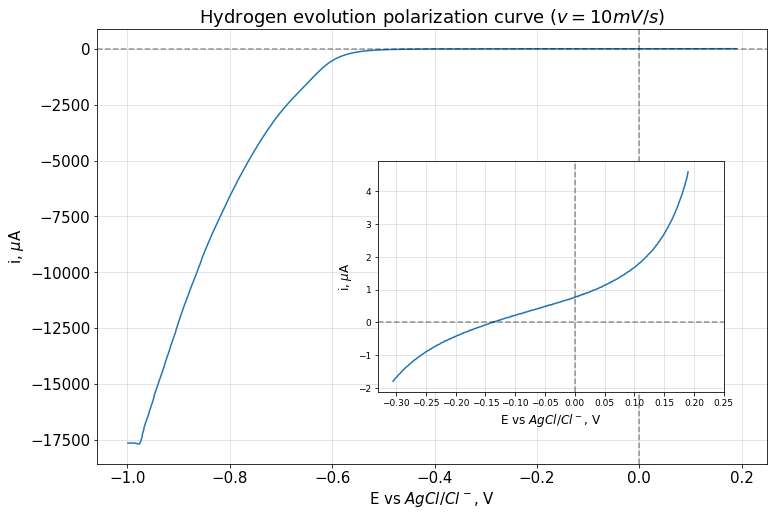

In [6]:
#Jnl
current = files['H_evolution']['Current(uA)'][:1200]
voltage = files['H_evolution']['Potential(V)'][:1200]

plt.figure(figsize=(12, 8))
plt.plot(voltage, current)

#Координатные оси x=0, y=0
plt.axhline(y=0, color='k', ls='--', alpha=0.4)
plt.axvline(x=0, color='k', ls='--', alpha=0.4)

plt.xlabel(r'E vs $AgCl/Cl^-$, V')
plt.ylabel(r'i, $\mu$A')
plt.grid('--', alpha=.4)
plt.title(r'Hydrogen evolution polarization curve $(v=10 mV/s)$')

current_edge = files['H_evolution']['Current(uA)'][:500]
voltage_edge = files['H_evolution']['Potential(V)'][:500]

a = plt.axes([0.45, 0.25, .4, .4])
plt.plot(voltage_edge, current_edge)

plt.axhline(y=0, color='k', ls='--', alpha=0.4)
plt.axvline(x=0, color='k', ls='--', alpha=0.4)

plt.ylabel(r'i, $\mu$A', fontsize=12)
plt.xlabel(r'E vs $AgCl/Cl^-$, V', fontsize=12)

plt.xticks(np.arange(-0.3, 0.3, 0.05), fontsize=9)
plt.yticks(np.arange(-2, 5, 1), fontsize=9)
plt.grid('--', alpha=0.4)



## Calculate the equilibrium potential (Nernst equation). Look up the appropriate activity coefficients for the experimental value of ionic strength.

In [7]:
c = 0.25
I = 1.5 #M
lgy = -0.5 * I ** 0.5/(I ** 0.5 + 1) + 0.1 * I
y = 10 ** lgy
Eeq = 0.059 * np.log10(y * c)
print(y)
print(f'H+ equilibrium potential: {Eeq * 1000:.4f} mV')

0.7494538093521782
H+ equilibrium potential: -42.9116 mV


# 3.3. Plot (on a single graph) the polarization curves for metal dissolution (forward cycles only, I vs. E curves) without and with the addition of different amounts of KCl. 

In [8]:
border = 1626
ml0 =pd.read_csv('data/0mL_KCl.dat', sep='\t')[:border]
ml2 =pd.read_csv('data/2mL_KCl.dat', sep='\t')[:border]
ml4 =pd.read_csv('data/4mL_KCl.dat', sep='\t')[:border]
ml6 =pd.read_csv('data/6mL_KCl.dat', sep='\t')[:border]
ml8 =pd.read_csv('data/8mL_KCl.dat', sep='\t')[:border]
ml10 =pd.read_csv('data/10mL_KCl.dat', sep='\t')[:border]

### Add current density in $mA/cm^2$

In [9]:
A = 0.9 * 0.2 # cm2
ml0['i_mA/cm2'] = ml0['Current(uA)'] / 1000 / A 
ml2['i_mA/cm2'] = ml2['Current(uA)'] / 1000 / A 
ml4['i_mA/cm2'] = ml4['Current(uA)'] / 1000 / A 
ml6['i_mA/cm2'] = ml6['Current(uA)'] / 1000 / A 
ml8['i_mA/cm2'] = ml8['Current(uA)'] / 1000 / A 
ml10['i_mA/cm2'] = ml10['Current(uA)'] / 1000 / A 

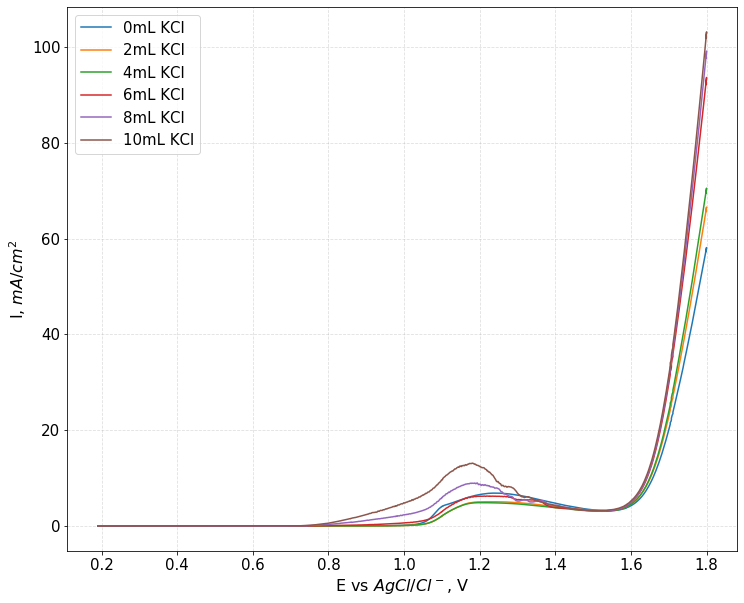

In [10]:
plt.figure(figsize=(12, 10))
plt.plot(ml0['Potential(V)'], ml0['i_mA/cm2'], label='0mL KCl')
plt.plot(ml2['Potential(V)'], ml2['i_mA/cm2'], label='2mL KCl')
plt.plot(ml4['Potential(V)'], ml4['i_mA/cm2'], label='4mL KCl')
plt.plot(ml6['Potential(V)'], ml6['i_mA/cm2'], label='6mL KCl')
plt.plot(ml8['Potential(V)'], ml8['i_mA/cm2'], label='8mL KCl')
plt.plot(ml10['Potential(V)'], ml10['i_mA/cm2'], label='10mL KCl')

plt.grid(ls='--', alpha=0.4)
plt.ylabel(r'I, $mA/cm^2$', fontsize=16)
plt.xlabel(r'E vs $AgCl/Cl^-$, V', fontsize=16)
plt.legend()

## Mark $E_{p}$, $i_{p}$, $E_{cp}$, $E_{op}$, $i_{cp}$ values. Fill in the table. 

In [11]:
max_treshold = 1.58
min_treshold =0.73
ml0_new = ml0[(ml0['Potential(V)'] > min_treshold) & (ml0['Potential(V)'] < max_treshold)]
ml2_new = ml2[(ml2['Potential(V)'] > min_treshold) & (ml2['Potential(V)'] < max_treshold)]
ml4_new = ml4[(ml4['Potential(V)'] > min_treshold) & (ml4['Potential(V)'] < max_treshold)]
ml6_new = ml6[(ml6['Potential(V)'] > min_treshold) & (ml6['Potential(V)'] < max_treshold)]
ml8_new = ml8[(ml8['Potential(V)'] > min_treshold) & (ml8['Potential(V)'] < max_treshold)]
ml10_new = ml10[(ml10['Potential(V)'] > min_treshold) & (ml10['Potential(V)'] < max_treshold)]

Ip_ml0 = ml0_new['i_mA/cm2'].max()
Ip_ml2 = ml2_new['i_mA/cm2'].max()
Ip_ml4 = ml4_new['i_mA/cm2'].max()
Ip_ml6 = ml6_new['i_mA/cm2'].max()
Ip_ml8 = ml8_new['i_mA/cm2'].max()
Ip_ml10 = ml10_new['i_mA/cm2'].max()

Ep_ml0 = list(ml0_new.loc[ml0_new['i_mA/cm2'] == Ip_ml0]['Potential(V)'])[0]
Ep_ml2 = list(ml2_new.loc[ml2_new['i_mA/cm2'] == Ip_ml2]['Potential(V)'])[0]
Ep_ml4 = list(ml4_new.loc[ml4_new['i_mA/cm2'] == Ip_ml4]['Potential(V)'])[0]
Ep_ml6 = list(ml6_new.loc[ml6_new['i_mA/cm2'] == Ip_ml6]['Potential(V)'])[0]
Ep_ml8 = list(ml8_new.loc[ml8_new['i_mA/cm2'] == Ip_ml8]['Potential(V)'])[0]
Ep_ml10 = list(ml10_new.loc[ml10_new['i_mA/cm2'] == Ip_ml10]['Potential(V)'])[0]

C = [0, 2, 4, 6, 8, 10]
i_p = [Ip_ml0, Ip_ml2, Ip_ml4, Ip_ml6, Ip_ml8, Ip_ml10]
Ep = [Ep_ml0, Ep_ml2, Ep_ml4, Ep_ml6, Ep_ml8, Ep_ml10]

pick = pd.DataFrame({'KCl' : C,
                     'Ip' : i_p, 
                     'Ep' : Ep})
print('Ip:', i_p)
print('Ep:', Ep)
pick

Ip: [6.877777777777777, 5.0777777777777775, 4.878888888888889, 6.255555555555555, 9.0, 13.122222222222222]
Ep: [1.24, 1.218, 1.197, 1.212, 1.193, 1.18]


,KCl,Ip,Ep
0,0,6.877778,1.240
1,2,5.077778,1.218
2,4,4.878889,1.197
3,6,6.255556,1.212
4,8,9.000000,1.193
5,10,13.122222,1.180


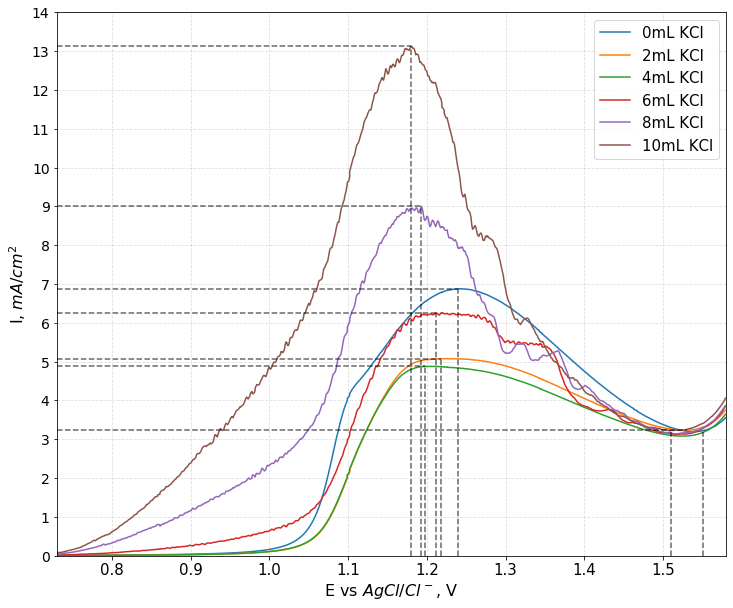

In [12]:
plt.figure(figsize=(12, 10))


plt.plot(ml0_new['Potential(V)'], ml0_new['i_mA/cm2'], label='0mL KCl')
plt.plot(ml2_new['Potential(V)'], ml2_new['i_mA/cm2'], label='2mL KCl')
plt.plot(ml4_new['Potential(V)'], ml4_new['i_mA/cm2'], label='4mL KCl')
plt.plot(ml6_new['Potential(V)'], ml6_new['i_mA/cm2'], label='6mL KCl')
plt.plot(ml8_new['Potential(V)'], ml8_new['i_mA/cm2'], label='8mL KCl')
plt.plot(ml10_new['Potential(V)'], ml10_new['i_mA/cm2'], label='10mL KCl')



for row in pick.values:
    y = np.linspace(0, row[1], 100)
    x = [row[2] for i in range(100)]
    plt.plot(x, y, ls='--', color='black', alpha=.6)

for row in pick.values:
    y = [row[1] for i in range(100)]
    x = np.linspace(min_treshold, row[2], 100)
    plt.plot(x, y, ls='--', color='black', alpha=.6)

    
y = np.linspace(0, 3.2, 100)
x = [1.51 for i in range(100)]
plt.plot(x, y, ls='--', color='black', alpha=.6)

y = np.linspace(0, 3.2, 100)
x = [1.55 for i in range(100)]
plt.plot(x, y, ls='--', color='black', alpha=.6)

y = [3.25 for i in range(100)]
x = np.linspace(min_treshold, max_treshold-0.05, 100)
plt.plot(x, y, ls='--', color='black', alpha=.6)


plt.ylim(0, 14)
plt.yticks(np.arange(0, 15, 1), fontsize=14)

plt.xlim(min_treshold, max_treshold)


plt.grid(ls='--', alpha=0.4)
plt.ylabel(r'I, $mA/cm^2$', fontsize=16)
plt.xlabel(r'E vs $AgCl/Cl^-$, V', fontsize=16)
plt.legend()

# 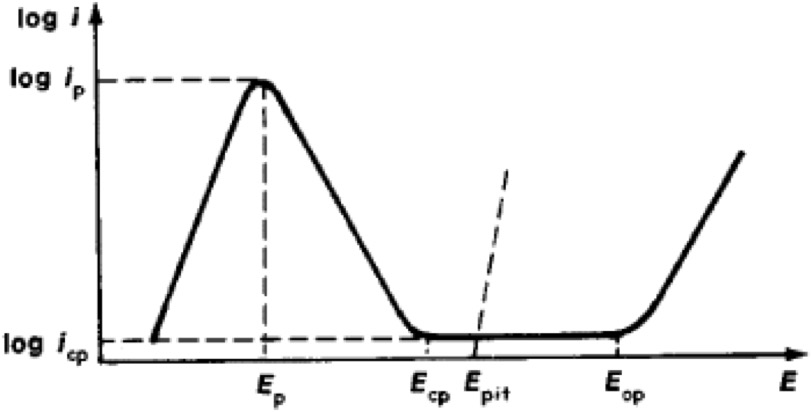


## Are these values dependent on the amount of added $KCl$ and why?

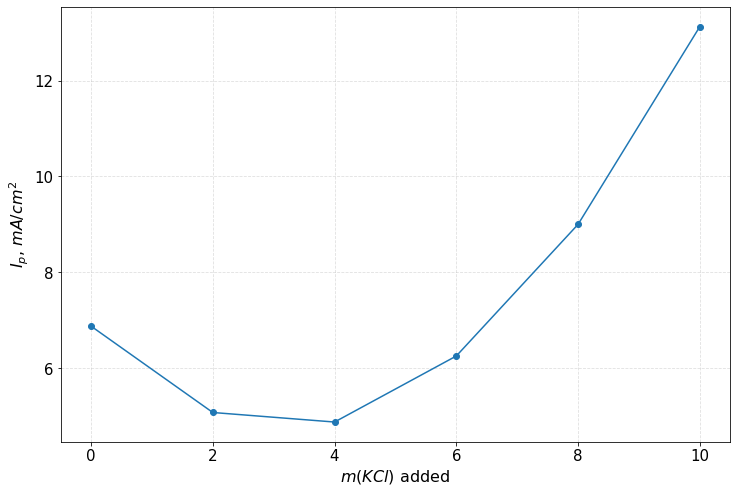

In [13]:
plt.figure(figsize=(12,8))
x = pick['KCl']
y = pick['Ip']

plt.plot(x, y, '-o')

plt.xlabel(r'$m(KCl)$ added ', fontsize=16)
plt.ylabel(r'$I_p$, $mA/cm^2$', fontsize=16)
plt.grid(ls='--', alpha=.4)


# 3.4. Plot the E vs. log |i| curves for the initial parts of polarization curves $(0.1 – 0.250 V vs. OCV)$ for hydrogen evolution and for anodic dissolution of metal (without the addition of $KCl$).

In [14]:
h_evolution = pd.read_csv('data/H_evolution.dat', sep='\t')[:border]
ml0_KCl = pd.read_csv('data/0mL_KCl.dat', sep='\t')[:border]

In [15]:
ml0_KCl['Current(uA)'] = abs(ml0_KCl['Current(uA)']) # берем модули токов
h_evolution['Current(uA)'] = abs(h_evolution['Current(uA)'])

ml0_KCl['log_i'] = np.log10(ml0_KCl['Current(uA)'])  # берем логарифм токов
h_evolution['log_i'] = np.log10(h_evolution['Current(uA)'])

In [16]:
ml0_KCl
# ml0_KCl[(ml0_KCl['Potential(V)'] < -0.1) & (ml0_KCl['Potential(V)'] > -0.5) ]

,Potential(V),Current(uA),log_i
0,0.190,0.07789,-1.108518
1,0.191,0.05810,-1.235824
2,0.192,0.04623,-1.335076
3,0.193,0.03073,-1.512437
4,0.194,0.02267,-1.644548
...,...,...,...
1621,1.798,10310.00000,4.013259
1622,1.799,10380.00000,4.016197
1623,1.800,10460.00000,4.019532
1624,1.799,10380.00000,4.016197


In [ ]:
kcl_right = 0.1
kcl_left = -0.65


h_right = -0.15
h_left = -0.55

mask_linear_KCl = (ml0_KCl['log_i'] < kcl_right) & \
                  (ml0_KCl['log_i'] > kcl_left)
linear_KCl = ml0_KCl[mask_linear_KCl]
x_KCl = linear_KCl['log_i']
y_KCl = linear_KCl['Potential(V)']
plt.plot(x, y)


mask_linear_H = (h_evolution['log_i'] < h_right) & \
                (h_evolution['log_i'] > h_left) & \
                (h_evolution['Potential(V)'] < -0.18)

linear_H = h_evolution[mask_linear_H]
x_H = linear_H['log_i']
y_H = linear_H['Potential(V)']
plt.plot(x_H, y_H)


slope_H, b_H = np.polyfit(x_H, y_H, 1)
slope_KCl, b_KCl = np.polyfit(x_KCl, y_KCl, 1)

x_space = np.linspace(-2, 0.5, 100)

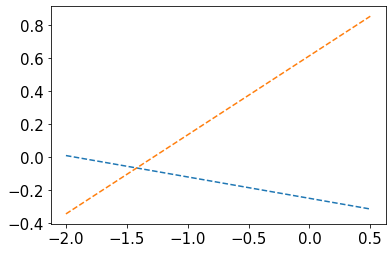

In [112]:
plt.plot(x_space,
x_space * slope_H + b_H,
        ls='--')

plt.plot(x_space,
x_space * slope_KCl + b_KCl,
        ls='--')

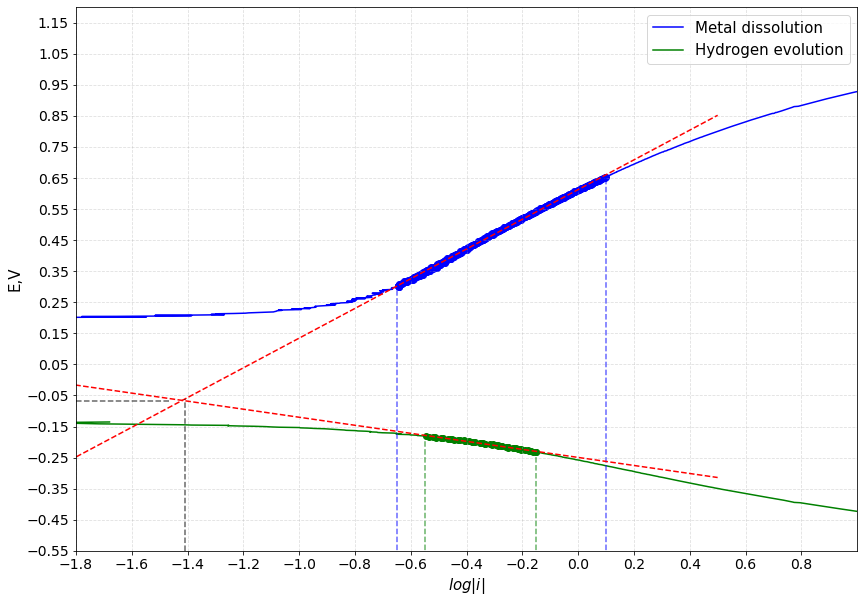

In [141]:
plt.figure(figsize=(14, 10))

x_min = -1.8
x_max = 1

y_min = -0.55
y_max = 1.2


mask_KCl = (ml0_KCl['log_i'] < 2) \
         & (ml0_KCl['log_i'] > -2) \
         & (ml0_KCl['Potential(V)'] > 0.2)

mask_H = (h_evolution['log_i'] < 2) & \
         (h_evolution['log_i'] > -2) & \
         (h_evolution['Potential(V)'] < -0.135)

ml0_KCl_plt = ml0_KCl[mask_KCl]
h_evolution_plt = h_evolution[mask_H]

plt.plot(ml0_KCl_plt['log_i'],
         ml0_KCl_plt['Potential(V)'],
         label='Metal dissolution',
         color='b')

plt.plot(h_evolution_plt['log_i'],
         h_evolution_plt['Potential(V)'],
         label='Hydrogen evolution',
         color='g')


min_hight = -0.6

#KCl left border
left_border_hight = 0.3

y = np.linspace(min_hight, left_border_hight, 100)
x = [kcl_left for i in range(100)]
plt.plot(x, y, ls='--', color='b', alpha=.6)

#KCl right border
right_border_hight = 0.66
y = np.linspace(min_hight, right_border_hight, 100)
x = [kcl_right for i in range(100)]
plt.plot(x, y, ls='--', color='b', alpha=.6)


#H left border
y = np.linspace(min_hight, -0.18, 100)
x = [h_left for i in range(100)]
plt.plot(x, y, ls='--', color='g', alpha=.6)

#H right border
y = np.linspace(min_hight, -0.22, 100)
x = [h_right for i in range(100)]
plt.plot(x, y, ls='--', color='g', alpha=.6)


#plot H linear part
linear_H = h_evolution[mask_linear_H]
x = linear_H['log_i']
y = linear_H['Potential(V)']
plt.scatter(x, y, color='g')

#plot KCl linear part
linear_KCl = ml0_KCl[mask_linear_KCl]
x = linear_KCl['log_i']
y = linear_KCl['Potential(V)']
plt.scatter(x, y, color='b')

#plot H linear approximation
plt.plot(x_space,
x_space * slope_H + b_H,
        color='r',
        ls='--')

#plot KCl linear approximation
plt.plot(x_space,
x_space * slope_KCl + b_KCl,
        ls='--',
        color='r')

plt.grid(alpha=.4, ls='--')


#plot supporting lines
y = np.linspace(y_min, -0.06, 100)
x = [-1.41 for i in range(100)]
plt.plot(x, y, ls='--', color='black', alpha=.6)

y = [-0.069 for i in range(100)]
x = np.linspace(x_min, -1.46, 100)
plt.plot(x, y, ls='--', color='black', alpha=.6)


plt.ylim(y_min, y_max)
plt.yticks(np.arange(y_min, y_max, 0.1), fontsize=14)

plt.xlim(x_min, x_max)
plt.xticks(np.arange(x_min, x_max, 0.2), fontsize=14)

plt.xlabel('$log|i|$')
plt.ylabel('E,V')
plt.legend()

In [147]:
print(f'Hydrogen Tafel slope: {slope_H:.3f}')
print(f'KCl Tafel slope: {slope_KCl:.3f}')

Hydrogen Tafel slope: -0.129
KCl Tafel slope: 0.478


In [150]:
R = 8.314
T = 273 # K
F = 96485
a_H = 2.3 * R * T/ (slope_H * F)
a_KCl = 2.3 * R * T/ (slope_KCl * F)
print(a_H)
print(a_KCl)

-0.41824146974886434
0.11311975602360513


#### 